In [4]:
# from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier    # 분류
# from sklearn.neighbors import KNeighborsRegressor     # 회귀 - 예측
from sklearn.linear_model import LinearRegression       # 선형회귀
from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
from sklearn.preprocessing import StandardScaler        # 표준화 작업
from sklearn.model_selection import train_test_split    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [5]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [3]:
df.shape

(159, 6)

In [6]:
# data, target
fish_input = df.iloc[:,1:].to_numpy()
fish_target =  df['Species'].to_numpy()

# 판다스로 변경
# pd.DataFrame(fish_input) 

In [7]:
# train, test 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [12]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
df.columns  # 6개 중 5개의 컬럼이 특성(feature -> 기울기 5개)

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [8]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# 훈련시키기
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(train_scaled, train_target)

LogisticRegression()

In [14]:
# 정답률
# print(lr.score(train_scaled, train_target))
# print(lr.score(test_scaled, test_target))

0.8067226890756303
0.85


### 경사하강법 : 머신러닝을 훈련하는 방법, 최적화하는 방법

In [21]:
# 더 좋은 최적화

from sklearn.linear_model import SGDClassifier

In [31]:
# loss =  회귀(예측)함수를 가져와서 적용시킴
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [32]:
# 다시 재훈련이 가능함
# partial_fit : 이전 기울기, y절편을 가지고 다시 훈련
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [33]:
# 에포크, 과대/과소적합 문제

# 그래프를 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)


In [13]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [43]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target,classes=classes)
    sc1 = sc.score(train_scaled, train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled, test_target)
    test_score.append(sc2)

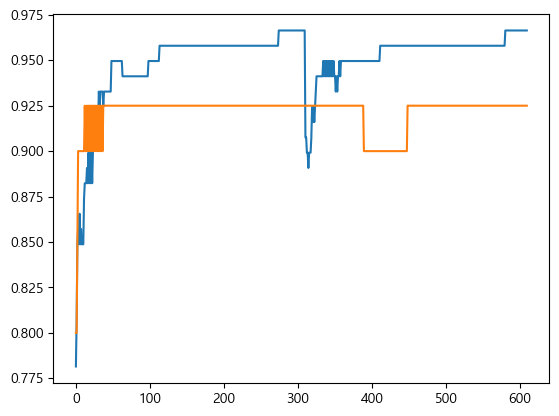

In [44]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [46]:
# tol = None : 무조건 max_iter = 100만큼 반복시켜줌
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
# 경사하강법 :  반복해서 머신러닝 훈련을 시켜 정답률을 높여주는 방법임